In [1]:
import processing.basic_stats
import processing.user_stats
import processing.meta_stats as ms

import seaborn as sns
import matplotlib.pyplot as plt

import yaml

from datetime import datetime
from utils.utils import print_data_example, preprocess_text, get_tweet_timestamp, separate_text_by_classes, fetch_import_module

sns.set_theme()
sns.set_style("whitegrid", {'axes.grid' : False, 'axes.linewidth':0})

In [2]:
#!pip show seaborn

# 1. Meta Perspective

## Data loading

In [3]:
config = yaml.safe_load(open("config.yaml"))

In [4]:
dataset_names = config['datasets']
data_sets_text, data_sets_user = [], []
for dset in dataset_names:
    dset_module = fetch_import_module(dset)
    data_sets_text.append(dset_module.get_data())
    data_sets_user.append(dset_module.get_user_data())

In [5]:
data_sets_text[-1][0]

{'text': '@USER She should ask a few native Americans what their take on this is.',
 'label': 'OFF'}

In [6]:
data_sets_text[1][0]

{'text': "!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...",
 'label': 'neither'}

## a) Class distribution and availability

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

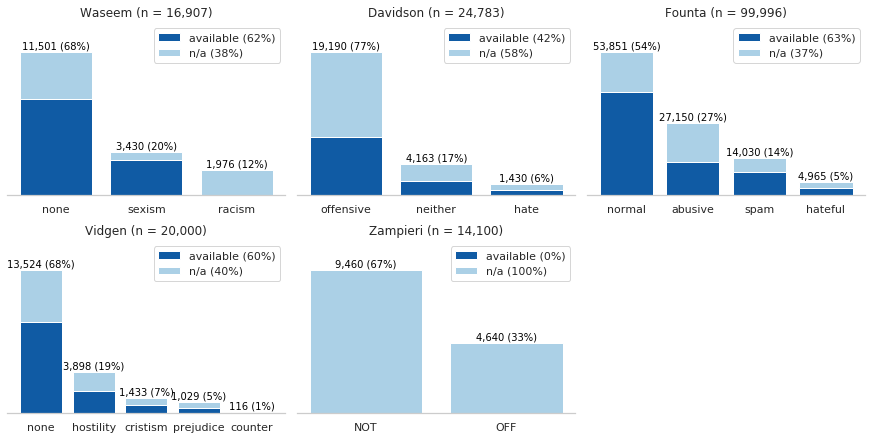

In [7]:
ms.plotClassesMultiple("",dataset_names,data_sets_text,data_sets_user,rows=2,cols=3)

## b) Time distribution

/home/tobias/anaconda3/envs/biaspaper/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/tobias/anaconda3/envs/biaspaper/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/tobias/anaconda3/envs/biaspaper/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
The PostScript backend does not support transparency; partially transparent artists will be rendered o

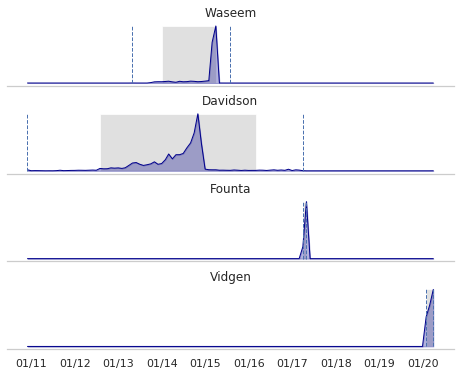

In [8]:
def getTimestamps(list_of_datasets):
    all_ts = []
    for dataset in list_of_datasets:
        if len(dataset) > 0:
            timestamps = list()
            for entry in dataset:
                timestamps.append(get_tweet_timestamp(entry['id'])[1])
            all_ts.append(timestamps)
    return all_ts 

ms.plotTimeDistMultiple(getTimestamps(data_sets_user),dataset_names,'')

## c) Pareto analysis of authors

/home/tobias/anaconda3/envs/biaspaper/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/tobias/anaconda3/envs/biaspaper/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/tobias/anaconda3/envs/biaspaper/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/tobias/anaconda3/envs/biaspaper/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: F

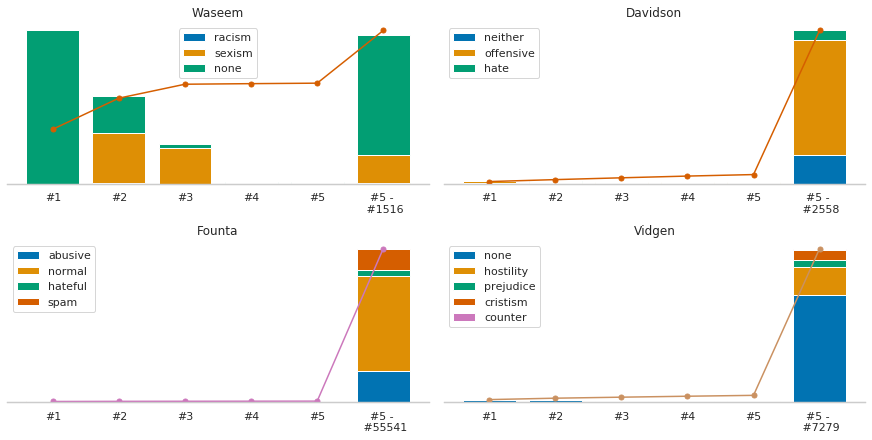

In [9]:
ms.plotUserDistMultiple(data_sets_user,"",dataset_names,n=5,rows=2,cols=2)